# **CLASSIFICATION & PREDICTION OF DIABETES**


---





### Mount Drive


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/WQD7003 - Data Analytics

/content/gdrive/My Drive/WQD7003 - Data Analytics


In [ ]:
# Import Required Modules

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from google.colab import drive
import scipy.stats as stats
%matplotlib inline
from scipy.stats import chi2_contingency
import scipy.stats as stats
import scipy.stats.distributions as dist
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Data Pre-processing

### Data Understanding
First, we load and have a glance at our dataset information. Next we will check for the number of missing values in each column.

In [ ]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


In [ ]:
df.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
count,403.000000,402.000000,403.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,141.000000,141.000000,401.000000,401.000000,400.000000
mean,15978.310174,207.845771,106.672457,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,152.382979,92.524823,37.900249,43.039900,341.250000
std,11881.122124,44.445557,53.076655,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,21.712952,11.555198,5.729313,5.656713,309.540953
min,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,110.000000,60.000000,26.000000,30.000000,5.000000
25%,4792.500000,179.000000,81.000000,38.000000,3.200000,4.380000,34.000000,63.000000,151.000000,121.250000,75.000000,138.000000,84.000000,33.000000,39.000000,90.000000
50%,15766.000000,204.000000,89.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,149.000000,92.000000,37.000000,42.000000,240.000000
75%,20336.000000,230.000000,106.000000,59.000000,5.400000,5.600000,60.000000,69.000000,200.000000,146.750000,90.000000,161.000000,100.000000,41.000000,46.000000,517.500000
max,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,238.000000,124.000000,56.000000,64.000000,1560.000000


In [ ]:
missingValues = df.isnull().sum()
print("Missing Values:" ,"\n")
print(missingValues)

Missing Values: 

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64


### Data Cleaning
Here we will start Data Cleaning. First we will be dropping '*bp.2s*' and '*bp.2d*' due to large number of missing values. We also dropping the 13 records from variable '*glyhb*' due to missing value as well.

In [ ]:
df = df.drop(['bp.2s','bp.2d'], axis=1)
df.dropna(subset =['glyhb'],inplace = True)
df.isnull().sum()

id           0
chol         1
stab.glu     0
hdl          1
ratio        1
glyhb        0
location     0
age          0
gender       0
height       5
weight       1
frame       11
bp.1s        5
bp.1d        5
waist        2
hip          2
time.ppn     3
dtype: int64

Here we check is the each patient/record is unique, if yes we will drop the '*id*' column and reset the index so that the records have index start from 0.

In [ ]:
df['id'].is_unique
df=df.drop(['id'],axis=1)
df = df.reset_index(drop=True)
df

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0
1,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0
2,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0
3,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0
4,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,301.0,90,118.0,2.6,4.280000,Louisa,89,female,61.0,115.0,medium,218.0,90.0,31.0,41.0,210.0
386,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0
387,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0
388,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0


Since the dataset we obtained **does not** include any dependent variable for our case, therefore, we will add a dependent variable '*diabetic*' here.

Diabetic status is based on the '*glyhb*' variable, if the value of '*glyhb*' >= 6.5, classify as 1 (indicates diabetic) ; else 0 (indicates non-diabetic)

Finally, we will drop the '*glyhb*' column.

In [ ]:
df['diabetic'] = df['glyhb'].apply(lambda x: 1 if x >= 6.5 else 0)

# where 1 = diabetic, 0 = non-diabetic
count = df['diabetic'].value_counts()
withDiabetes = count[1]
withoutDiabetes = count[0]
print(f"Diabetic Count: {withDiabetes} \nNon-Diabetic Count: {withoutDiabetes}")

df=df.drop(['glyhb'],axis=1)

Diabetic Count: 65 
Non-Diabetic Count: 325


### Data Imputation

Here we will be performing data imputation to fill in all the missing values to improve our data quality.

First, we investigate variables '*chol*', '*hdl*' and '*ratio*'. Based on our analysis, their boxplots (illustrated in Exploratory Data Analysis section) show right-skewness with a few plausible outliers. Therefore, we will be using **median** as it is more robust compare to mean to perform imputation here.

In [ ]:
medians_by_diabetic = df.groupby('diabetic')[['chol', 'ratio', 'hdl']].median()

df['chol'] = df.apply(lambda row: medians_by_diabetic.loc[row['diabetic']]['chol'] if pd.isna(row['chol']) else row['chol'], axis=1)
df['hdl'] = df.apply(lambda row: medians_by_diabetic.loc[row['diabetic']]['hdl'] if pd.isna(row['hdl']) else row['hdl'], axis=1)
df['ratio'] = df.apply(lambda row: medians_by_diabetic.loc[row['diabetic']]['chol']/row['hdl'] if pd.isna(row['ratio']) else row['ratio'], axis=1)

df.isnull().sum()

chol         0
stab.glu     0
hdl          0
ratio        0
location     0
age          0
gender       0
height       5
weight       1
frame       11
bp.1s        5
bp.1d        5
waist        2
hip          2
time.ppn     3
diabetic     0
dtype: int64

Next, we are predicting the missing value of variable '*weight*' using '*hip*' and '*waist*' with **Linear Regression** model

In [ ]:
features = ['hip', 'waist']
target = 'weight'
df_impute = df.copy()

df_impute = df_impute.dropna(subset=['hip', 'waist'])

df_missing_weight = df_impute[df_impute['weight'].isna()]
df_not_missing_weight = df_impute[~df_impute['weight'].isna()]

model = LinearRegression()
model.fit(df_not_missing_weight[features], df_not_missing_weight[target])


predicted_weights = model.predict(df_missing_weight[features])

df.loc[df['weight'].isna(), 'weight'] = predicted_weights
df.isnull().sum()

chol         0
stab.glu     0
hdl          0
ratio        0
location     0
age          0
gender       0
height       5
weight       0
frame       11
bp.1s        5
bp.1d        5
waist        2
hip          2
time.ppn     3
diabetic     0
dtype: int64

Since we got all the values for '*weight*' variable, therefore we will be using it to fill up the missing values of '*hip*' and '*waist*' as well.

In [ ]:
features = ['weight']
targets = ['hip', 'waist']

df_impute = df.copy()

df_missing_values = df_impute[df_impute[targets].isna().any(axis=1)]
df_not_missing_values = df_impute[~df_impute[targets].isna().any(axis=1)]

models = {}
for target in targets:
    model = LinearRegression()
    model.fit(df_not_missing_values[features], df_not_missing_values[target])
    models[target] = model

for target in targets:
    predicted_values = models[target].predict(df_missing_values[features])
    df.loc[df[targets].isna().any(axis=1), target] = predicted_values

df.isnull().sum()

chol         0
stab.glu     0
hdl          0
ratio        0
location     0
age          0
gender       0
height       5
weight       0
frame       11
bp.1s        5
bp.1d        5
waist        0
hip          0
time.ppn     3
diabetic     0
dtype: int64

We will be using **Median** to perform imputation for variables '*bp.1d*', '*bp.1s*' and '*time.ppn*'.

In [ ]:
df["bp.1s"].replace(to_replace=np.nan,value=df["bp.1s"].median(), inplace=True)
df["bp.1d"].replace(to_replace=np.nan,value=df["bp.1d"].median(), inplace=True)
df["time.ppn"].replace(to_replace=np.nan,value=df["time.ppn"].median(), inplace=True)
df.isnull().sum()

chol         0
stab.glu     0
hdl          0
ratio        0
location     0
age          0
gender       0
height       5
weight       0
frame       11
bp.1s        0
bp.1d        0
waist        0
hip          0
time.ppn     0
diabetic     0
dtype: int64

Next, we will impute missing values for variable '*height*' based on the median height of each gender.

In [ ]:
median_height_by_gender = df.groupby("gender")["height"].median()

def impute_height(row):
    if pd.notna(row["height"]):
        return row["height"]
    gender = row["gender"]
    return median_height_by_gender[gender]


df["height"] = df.apply(impute_height, axis=1)
df.isnull().sum()

chol         0
stab.glu     0
hdl          0
ratio        0
location     0
age          0
gender       0
height       0
weight       0
frame       11
bp.1s        0
bp.1d        0
waist        0
hip          0
time.ppn     0
diabetic     0
dtype: int64

Finally, we will be utilising **Decision Tree Classifer** to impute the missing values of variable '*frame*'. Varibles such as '*gender*',  '*height*', '*weight*', '*hip*', '*waist*' will be used to impute '*frame*'.

In [ ]:
features = ['gender','height','weight','hip', 'waist']
target = 'frame'
df_impute = df.copy()
df_impute['gender'] = df_impute['gender'].apply(lambda x: 1 if x =='male' else 0) # convert gender string to numerical


df_missing_frame = df_impute[df_impute['frame'].isna()]
df_not_missing_frame = df_impute[~df_impute['frame'].isna()]

model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(df_not_missing_frame[features], df_not_missing_frame[target])

#Predict the response for test dataset
predicted_frame = model.predict(df_missing_frame[features])

df.loc[df['frame'].isna(), 'frame'] = predicted_frame

df.isnull().sum()

chol        0
stab.glu    0
hdl         0
ratio       0
location    0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
diabetic    0
dtype: int64

## Exploratory Data Analysis

### Summary Statistics

In [ ]:
df.describe()

,chol,stab.glu,hdl,ratio,age,height,weight,bp.1s,bp.1d,waist,hip,time.ppn,diabetic
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.253846,107.338462,50.258974,4.525728,46.774359,65.946154,177.231599,137.133333,83.269231,37.876134,43.013662,335.384615,0.166667
std,44.659404,53.798188,17.279856,1.736307,16.435911,3.914862,40.458726,22.849517,13.495570,5.755213,5.641488,307.825704,0.373157
min,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000,5.000000,0.000000
25%,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.000000,122.000000,75.000000,33.000000,39.000000,90.000000,0.000000
50%,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,172.500000,136.000000,82.000000,37.000000,42.000000,240.000000,0.000000
75%,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,199.750000,148.000000,90.000000,41.000000,46.000000,480.000000,0.000000
max,443.000000,385.000000,120.000000,19.299999,92.000000,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000,1560.000000,1.000000


In [ ]:
print("Mean \n")
df.groupby('diabetic').mean().T

Mean 



<ipython-input-17-70d107f3111e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('diabetic').mean().T


diabetic,0,1
chol,202.941538,228.815385
stab.glu,90.889231,189.584615
hdl,51.212308,45.492308
ratio,4.303797,5.635385
age,44.443077,58.430769
height,65.916923,66.092308
weight,174.566154,190.558825
bp.1s,134.920000,148.200000
bp.1d,82.972308,84.753846
waist,37.297515,40.769231


In [ ]:
print("Median \n")
df.groupby('diabetic').median().T

Median 



<ipython-input-18-abe4a0f07f96>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('diabetic').median().T


diabetic,0,1
chol,199.0,219.0
stab.glu,86.0,184.0
hdl,47.0,41.0
ratio,4.1,5.3
age,41.0,59.0
height,66.0,67.0
weight,170.0,183.0
bp.1s,132.0,146.0
bp.1d,82.0,86.0
waist,37.0,40.0


In [ ]:
print("Standard Deviation \n")
df.groupby('diabetic').std().T

Standard Deviation 



<ipython-input-19-994ae4dc222c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('diabetic').std().T


diabetic,0,1
chol,40.625202,56.575694
stab.glu,24.804172,78.947746
hdl,16.942017,18.278337
ratio,1.423838,2.561276
age,16.095030,12.841545
height,3.954509,3.736321
weight,40.093634,39.936202
bp.1s,22.713046,20.309481
bp.1d,13.559739,13.171976
waist,5.625735,5.558690


### Boxplots

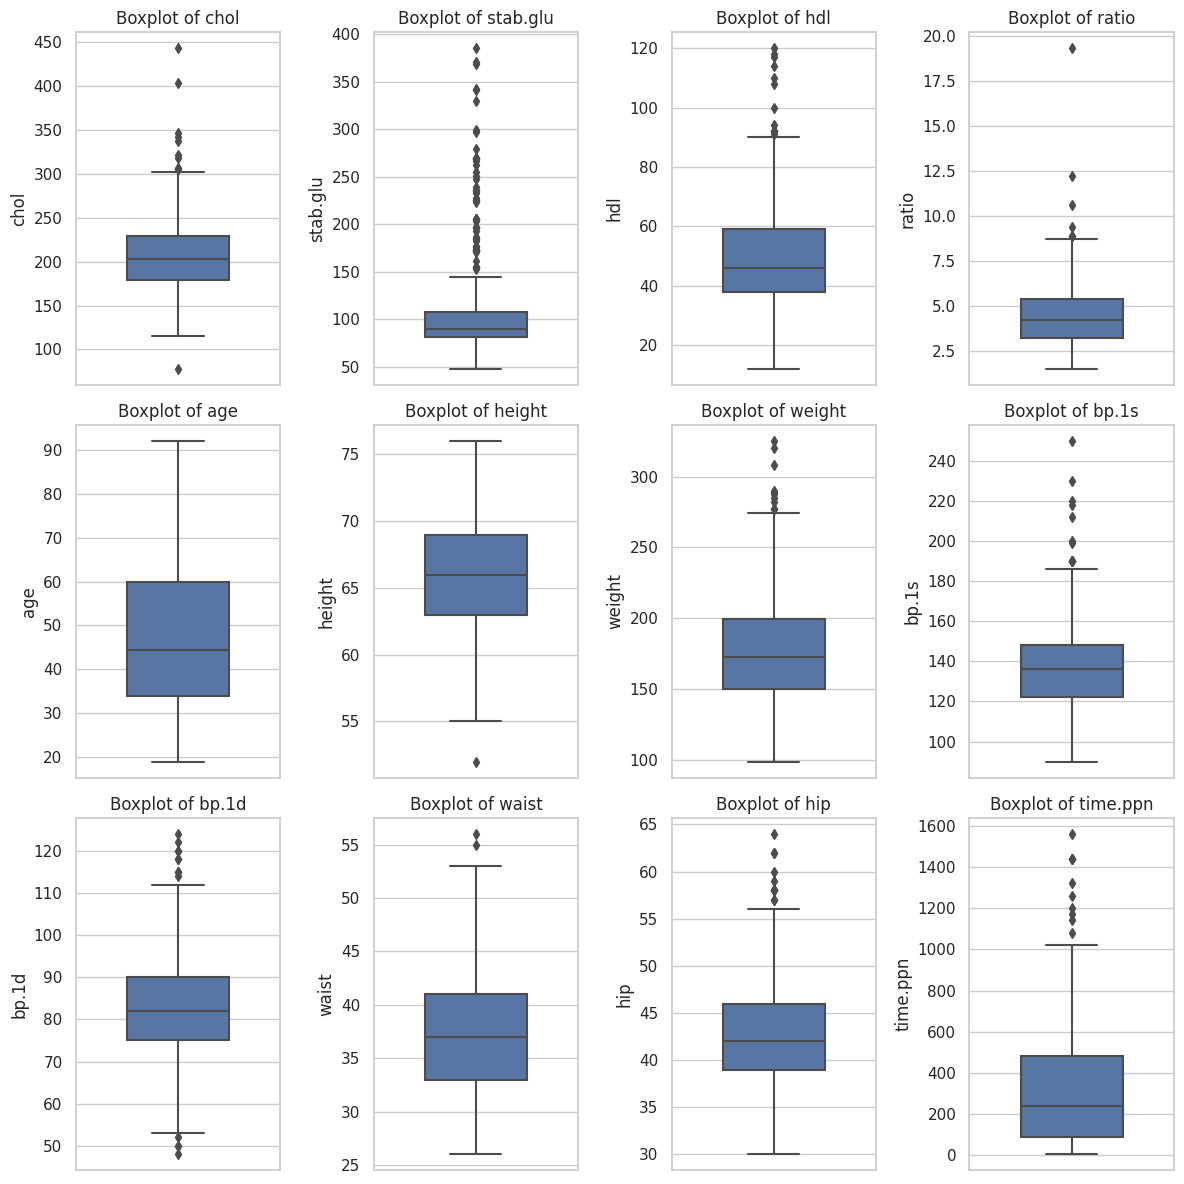

In [ ]:
columns_to_exclude = ['location', 'gender', 'frame','diabetic']
filtered_columns = [col for col in df.columns if col not in columns_to_exclude]

plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
for col in filtered_columns:
    plt.subplot(3, 4, filtered_columns.index(col) + 1)
    sns.boxplot(data=df, y=col, orient="v", width=0.5)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

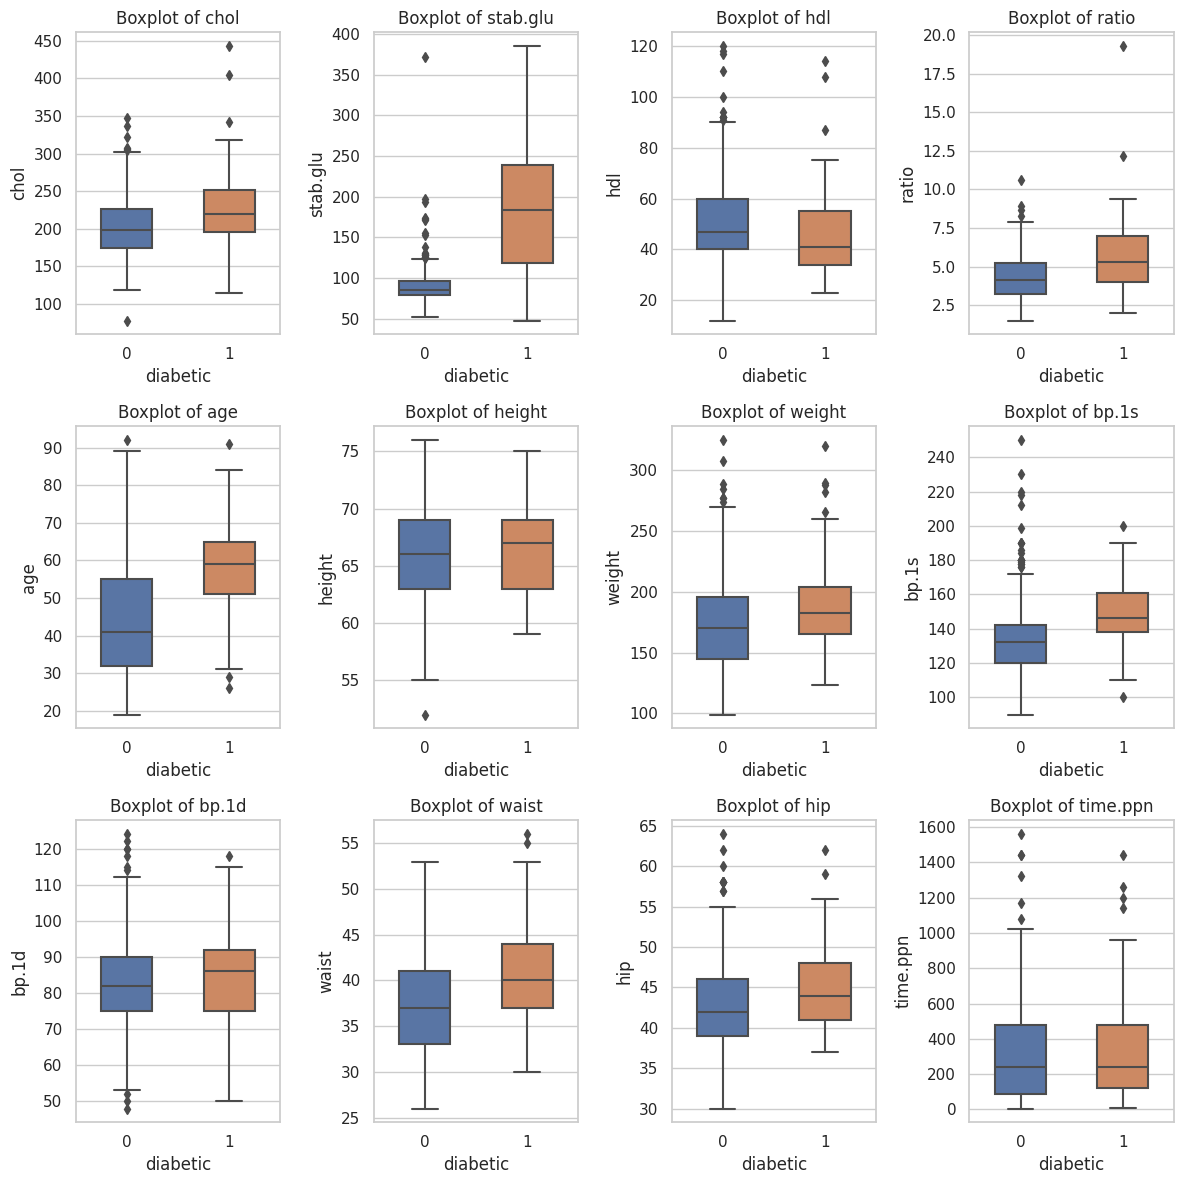

In [ ]:
columns_to_exclude = ['location', 'gender', 'frame', 'diabetic']
filtered_columns = [col for col in df.columns if col not in columns_to_exclude]

plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")

for i, col in enumerate(filtered_columns):
    plt.subplot(3, 4, i + 1)

    sns.boxplot(x="diabetic", y=col, data=df, width=0.5)
    plt.title(f'Boxplot of {col}')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.savefig("Boxplots_pair.pdf", format="pdf")
plt.tight_layout()
plt.show()

### Pairwise Pearson Correlation Plot
And graphical plot to investigate pairwise relationships of continuous variables

In [ ]:
continuous_variables = df.select_dtypes(include=['float64'])

correlation_matrix = continuous_variables.corr(method='pearson')

p_values = pd.DataFrame(index=continuous_variables.columns, columns=continuous_variables.columns)

for col1 in continuous_variables.columns:
    for col2 in continuous_variables.columns:
        if col1 != col2:
            non_nan_rows = ~continuous_variables[[col1, col2]].isna().any(axis=1)
            corr, p_value = stats.pearsonr(continuous_variables[non_nan_rows][col1], continuous_variables[non_nan_rows][col2])
            p_values.at[col1, col2] = p_value

print("Correlation Matrix:")
print(correlation_matrix)
print("\nP-Values:")
print(p_values)

Correlation Matrix:
              chol       hdl     ratio    height    weight     bp.1s  \
chol      1.000000  0.193256  0.475752 -0.069954  0.070312  0.206772   
hdl       0.193256  1.000000 -0.681900 -0.090995 -0.287048  0.032583   
ratio     0.475752 -0.681900  1.000000  0.081767  0.280616  0.114091   
height   -0.069954 -0.090995  0.081767  1.000000  0.247133 -0.042653   
weight    0.070312 -0.287048  0.280616  0.247133  1.000000  0.097588   
bp.1s     0.206772  0.032583  0.114091 -0.042653  0.097588  1.000000   
bp.1d     0.166756  0.079643  0.037351  0.047277  0.169931  0.603485   
waist     0.132257 -0.275020  0.311100  0.052358  0.852510  0.207571   
hip       0.089831 -0.220478  0.204489 -0.106950  0.830774  0.150316   
time.ppn  0.013192  0.065696 -0.041882 -0.012302 -0.048421 -0.077174   

             bp.1d     waist       hip  time.ppn  
chol      0.166756  0.132257  0.089831  0.013192  
hdl       0.079643 -0.275020 -0.220478  0.065696  
ratio     0.037351  0.311100  0.20

In [ ]:
pp = sns.pairplot(df,hue='diabetic')
pp

Output hidden; open in https://colab.research.google.com to view.

### Histogram
According to diabetic status.

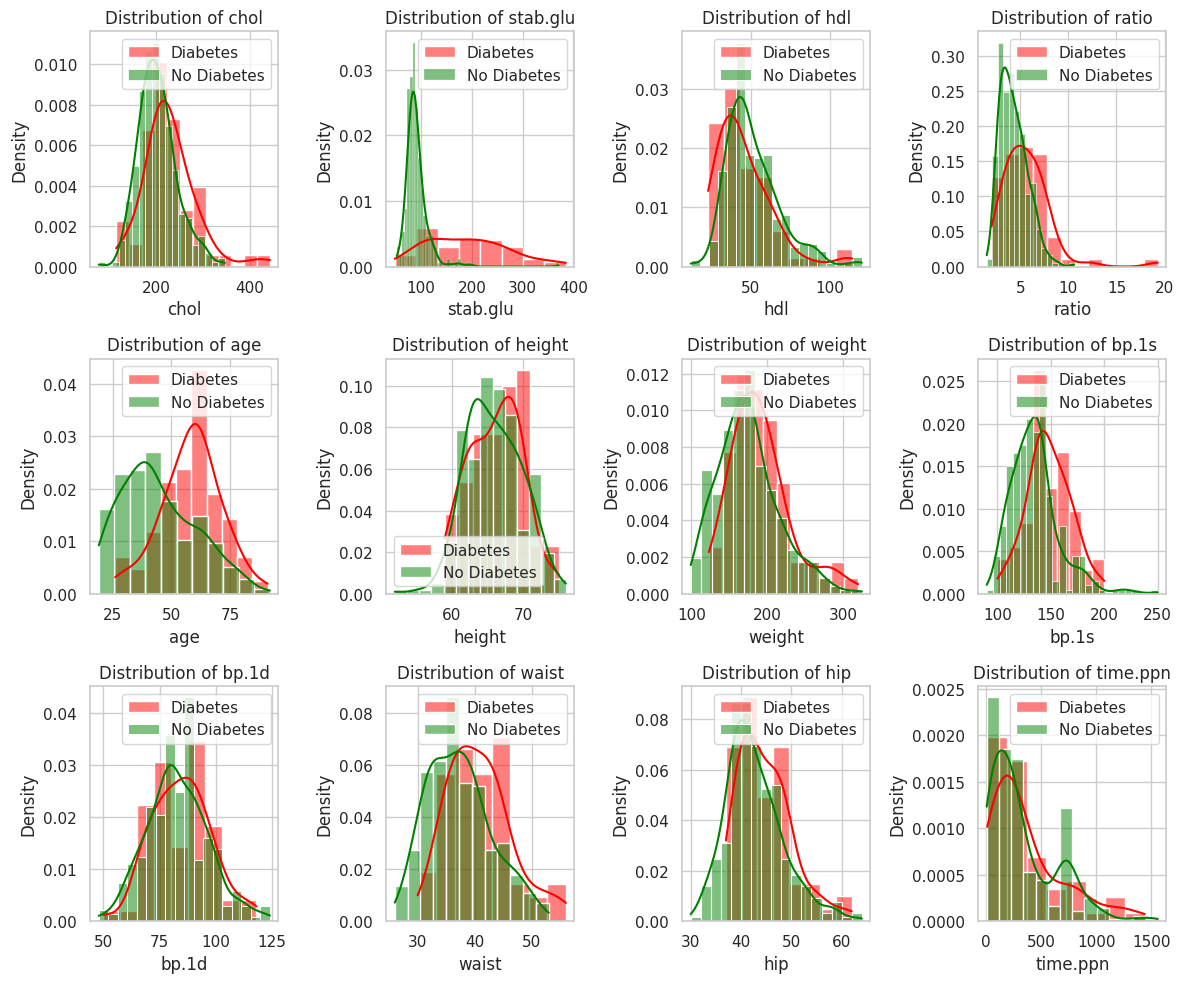

In [ ]:
attributes_to_exclude = ['location', 'gender', 'frame']

df_filtered = df.drop(attributes_to_exclude, axis=1)

plt.figure(figsize=(12, 10))
for i, col in enumerate(df_filtered.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_filtered[df_filtered['diabetic'] == 1][col], kde=True, label='Diabetes', color='red', stat = 'density')
    sns.histplot(df_filtered[df_filtered['diabetic'] == 0][col], kde=True, label='No Diabetes', color='green',stat = 'density')
    plt.title(f"Distribution of {col}")
    plt.legend()
plt.tight_layout()
plt.show()

### Probability Plot (Q-Q plot)

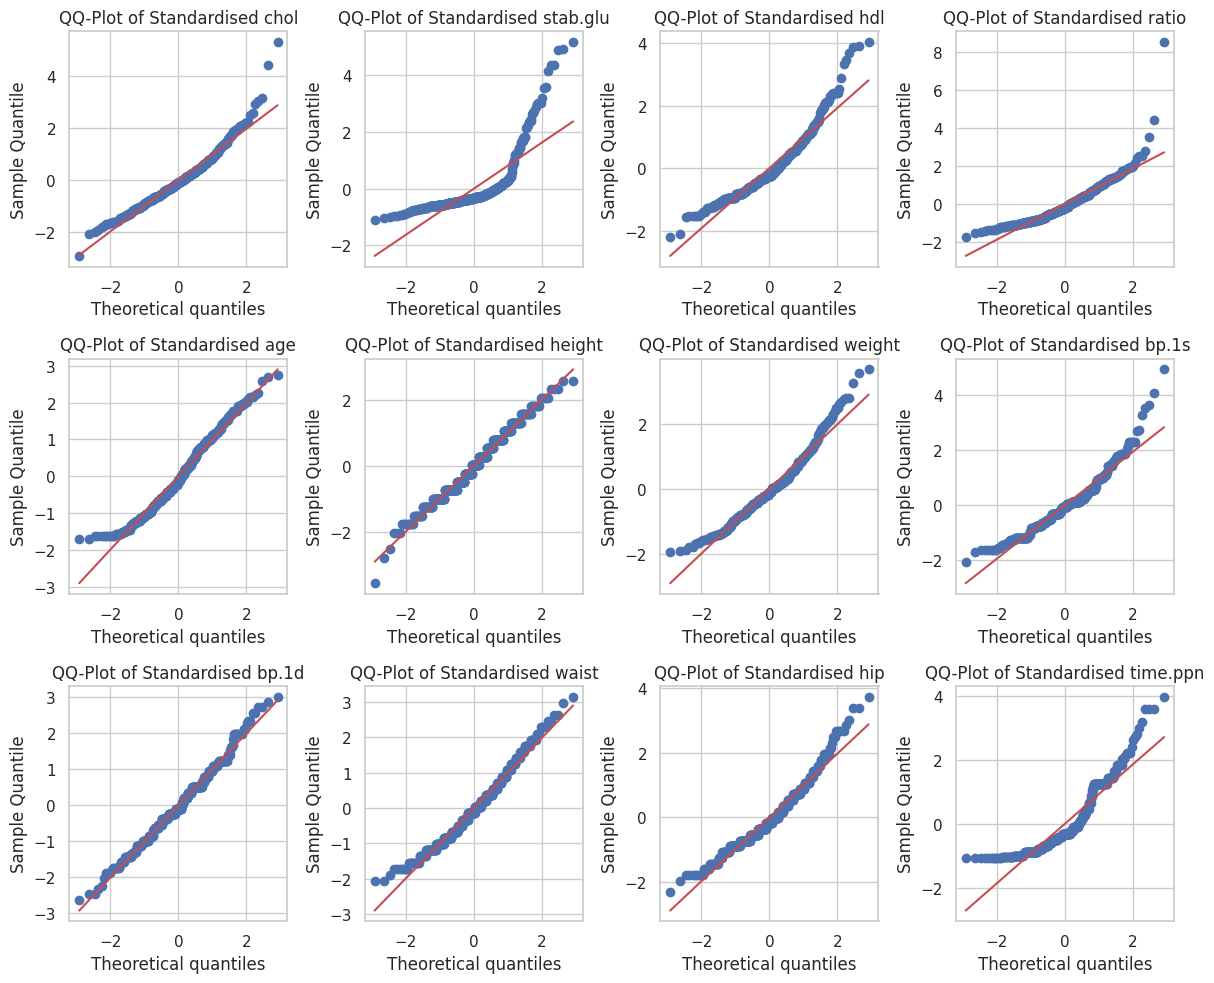

In [ ]:
attributes_to_exclude = ['location', 'gender', 'frame']

df_filtered = df.drop(attributes_to_exclude, axis=1)

plt.figure(figsize=(12, 10))
for i, col in enumerate(df_filtered.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    stats.probplot((df_filtered[col]-np.mean(df_filtered[col]))/np.std(df_filtered[col]), plot=plt)
    plt.title(f"QQ-Plot of Standardised {col}")
    plt.ylabel("Sample Quantile")

plt.tight_layout()
plt.show()

### Countplot and numerical representation for Categorical Data

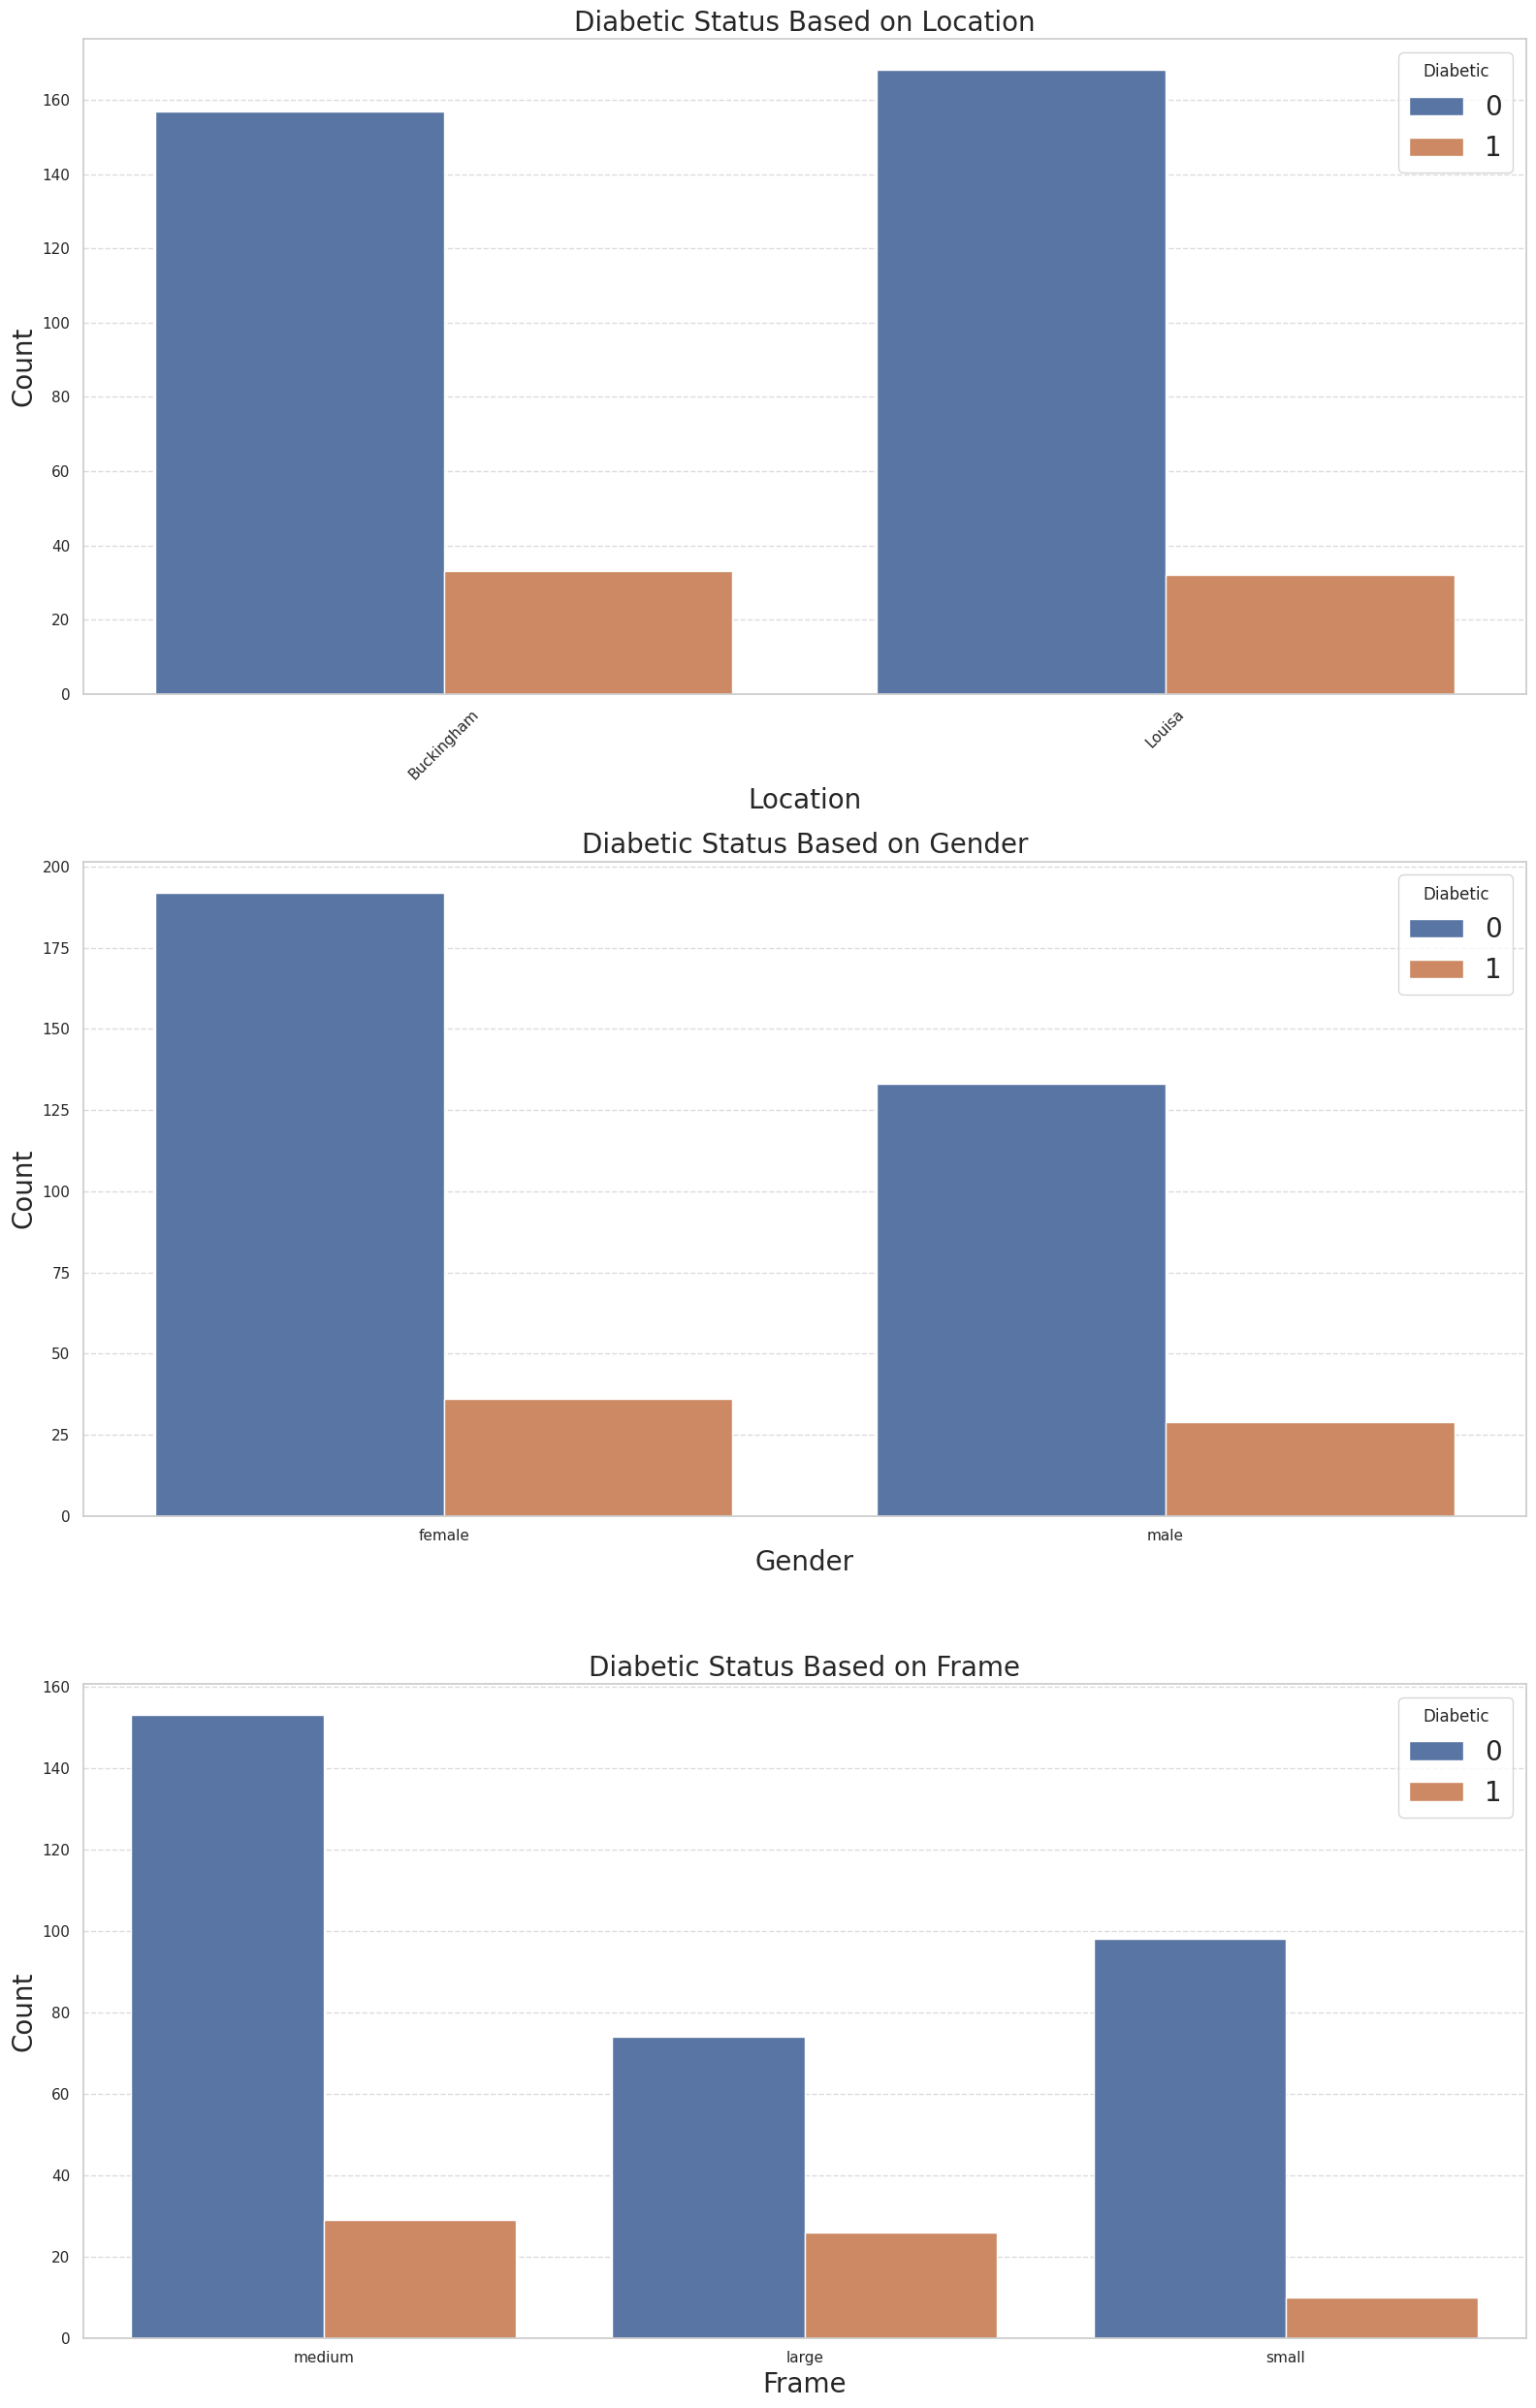

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(16, 25))

sns.countplot(x='location', hue='diabetic', data=df, ax=axes[0])
axes[0].set_title('Diabetic Status Based on Location', fontsize=20)
axes[0].set_xlabel('Location', fontsize=20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].legend(title='Diabetic', loc='upper right', fontsize=20)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='gender', hue='diabetic', data=df, ax=axes[1])
axes[1].set_title('Diabetic Status Based on Gender', fontsize=20)
axes[1].set_xlabel('Gender', fontsize=20)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].legend(title='Diabetic', loc='upper right', fontsize=20)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

sns.countplot(x='frame', hue='diabetic', data=df, ax=axes[2])
axes[2].set_title('Diabetic Status Based on Frame', fontsize=20)
axes[2].set_xlabel('Frame', fontsize=20)
axes[2].set_ylabel('Count', fontsize=20)
axes[2].legend(title='Diabetic', loc='upper right', fontsize=20)
axes[2].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
location_proportions = df.groupby('location')['diabetic'].mean()

frame_proportions = df.groupby('frame')['diabetic'].mean()

gender_proportions = df.groupby('gender')['diabetic'].mean()

# Print results
print("Proportions of Diabetics based on Location:")
print(location_proportions)

print("\nProportions of Diabetics based on Frame:")
print(frame_proportions)

print("\nProportions of Diabetics based on Gender:")
print(gender_proportions)

Proportions of Diabetics based on Location:
location
Buckingham    0.173684
Louisa        0.160000
Name: diabetic, dtype: float64

Proportions of Diabetics based on Frame:
frame
large     0.260000
medium    0.159341
small     0.092593
Name: diabetic, dtype: float64

Proportions of Diabetics based on Gender:
gender
female    0.157895
male      0.179012
Name: diabetic, dtype: float64


### Statistical Analyses & Tests for Categorical Variable

Gender

In [ ]:
female_count = df[df['gender'] == 'female'].shape[0]
male_count = df[df['gender'] == 'male'].shape[0]

female_diab, male_diab=df.groupby('gender')['diabetic'].sum()

def z_test_2_sample_proportions(x1, x2, n1, n2, two_tailed=True):

    avg_p = (x1 + x2) / (n1 + n2)
    z_val = (x1/n1 - x2/n2) / np.sqrt(avg_p * (1-avg_p) * (1/n1 + 1/n2))
    z_prob = dist.norm.cdf(-np.abs(z_val))

    if two_tailed:
      print(f"z-value: {z_val} , p-value: {2*z_prob}")


    else:
      print(f"z-value: {z_val} , p-value: {z_prob}")


z_test_2_sample_proportions(female_diab,male_diab,female_count,male_count, two_tailed=True)

# Since the p-value is greater than the typical significance level of 0.05,
# you would not reject the null hypothesis at the 0.05 significance level.
# So, not enough evidence to conclude that there is a significant difference

z-value: -0.5514467945790074 , p-value: 0.5813274300175746


Location

In [ ]:
Louisa_count = df[df['location'] == 'Louisa'].shape[0]
Buckingham_count = df[df['location'] == 'Buckingham'].shape[0]

Buck_diab, Loui_diab=df.groupby('location')['diabetic'].sum()

z_test_2_sample_proportions(Buck_diab,Loui_diab,Buckingham_count,Louisa_count, two_tailed = True)

z-value: 0.36244781838580814 , p-value: 0.717017411190141


Frame with **Chi-Squared**

In [ ]:
contingency_table = pd.crosstab(df['frame'], df['diabetic'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-squared test results:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

alpha=0.05
if p < alpha:
    print("There is a statistically significant association between 'frame' and 'diabetes.'")
else:
    print("There is no statistically significant association between 'frame' and 'diabetes.'")

Contingency Table:
diabetic    0   1
frame            
large      74  26
medium    153  29
small      98  10

Chi-squared test results:
Chi-squared statistic: 10.608996336996334
P-value: 0.004969191299567443
There is a statistically significant association between 'frame' and 'diabetes.'


### Statistical Analyses & Tests for Continuous Variable

In [ ]:
df_testing = df.drop(['gender','location','frame'], axis=1)

df_no_diabetic = df_testing.drop('diabetic', axis=1)


alpha = 0.05

# Iterate through each variable for z-test
for column in df_no_diabetic.columns:
    # Separate data into diabetic and non-diabetic groups
    diabetic_data = df_testing[df_testing['diabetic'] == 1][column]
    non_diabetic_data = df_testing[df_testing['diabetic'] == 0][column]

    # Calculate means
    mean_diabetic = diabetic_data.mean()
    mean_non_diabetic = non_diabetic_data.mean()

    # Calculate standard deviations
    std_diabetic = diabetic_data.std()
    std_non_diabetic = non_diabetic_data.std()

    # Calculate standard error of the mean (SE)
    se_diabetic = std_diabetic / (len(diabetic_data) ** 0.5)
    se_non_diabetic = std_non_diabetic / (len(non_diabetic_data) ** 0.5)

    # Calculate z-score
    z_score = (mean_diabetic - mean_non_diabetic) / ((se_diabetic**2 + se_non_diabetic**2)**0.5)

    # Two-tailed z-test
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    # Decision Rule: Reject the null hypothesis if p-value is less than alpha
    if p_value < alpha:
        print(f"{column}: Reject the null hypothesis. p-value: {p_value}")
    else:
        print(f"{column}: Fail to reject the null hypothesis. p-value: {p_value}")

    # Print z-score and p-value
    print(f"  Z-Score: {z_score}")
    print(f"  P-Value: {p_value}\n")

chol: Reject the null hypothesis. p-value: 0.000447175545025269
  Z-Score: 3.5105530651785495
  P-Value: 0.000447175545025269

stab.glu: Reject the null hypothesis. p-value: 0.0
  Z-Score: 9.980873393190418
  P-Value: 0.0

hdl: Reject the null hypothesis. p-value: 0.019769683397984572
  Z-Score: -2.330690539584151
  P-Value: 0.019769683397984572

ratio: Reject the null hypothesis. p-value: 4.748266399468015e-05
  Z-Score: 4.067684236049568
  P-Value: 4.748266399468015e-05

age: Reject the null hypothesis. p-value: 1.84297022087776e-14
  Z-Score: 7.6605151446249415
  P-Value: 1.84297022087776e-14

height: Fail to reject the null hypothesis. p-value: 0.7323035028704685
  Z-Score: 0.3420629715128867
  P-Value: 0.7323035028704685

weight: Reject the null hypothesis. p-value: 0.003226058340302984
  Z-Score: 2.945334356355895
  P-Value: 0.003226058340302984

bp.1s: Reject the null hypothesis. p-value: 2.417762782869204e-06
  Z-Score: 4.7149448067325075
  P-Value: 2.417762782869204e-06

bp.1d

From the statistical analyses above, we can see that continuoues variables such as '*height*', '*bp1d*' and '*time.ppn*' are not significant.

## Machine Learning Modelling

In order for us to avoid the issue of **Data Leakage**, we will perform the imputation after the training set and test set are splitted.

In [ ]:
df = pd.read_csv("diabetes.csv")
df = df.drop(['bp.2s','bp.2d'], axis=1)
df.dropna(subset =['glyhb'],inplace = True)
df['diabetic'] = df['glyhb'].apply(lambda x: 1 if x >= 6.5 else 0)
df = df.drop(['glyhb','id', 'location'], axis=1)
df

,chol,stab.glu,hdl,ratio,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,diabetic
0,203.0,82,56.0,3.6,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,0
1,165.0,97,24.0,6.9,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,0
2,228.0,92,37.0,6.2,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0,0
3,78.0,93,12.0,6.5,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0,0
4,249.0,90,28.0,8.9,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,301.0,90,118.0,2.6,89,female,61.0,115.0,medium,218.0,90.0,31.0,41.0,210.0,0
398,296.0,369,46.0,6.4,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0,1
399,284.0,89,54.0,5.3,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0,0
400,194.0,269,38.0,5.1,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0,1


Here we used a while loop to ensure the test split does not contain any missing values, and we perform imputation on the training set.

In [ ]:
from sklearn.model_selection import train_test_split

X = df
y = df['diabetic']

i = 0
rand = 1
while (i != 1):
  X_train, X_test, y_train, y_test = train_test_split(X, y,random_state= rand, test_size=0.2, stratify = y )
  test_missing_indices = X_test.isnull().any(axis=1)
  X_test_no_missing = X_test[~test_missing_indices]
  rand = rand + 1
  if (X_test_no_missing.shape[0] == 78):
    i = 1

print(rand)

312


In [ ]:
X_train.isnull().sum()

chol         1
stab.glu     0
hdl          1
ratio        1
age          0
gender       0
height       5
weight       1
frame       11
bp.1s        5
bp.1d        5
waist        2
hip          2
time.ppn     3
diabetic     0
dtype: int64

### Function for imputation

In [ ]:
def impute_missing_values(df):

  medians_by_diabetic = df.groupby('diabetic')[['chol', 'ratio', 'hdl']].median()
  df['chol'] = df.apply(lambda row: medians_by_diabetic.loc[row['diabetic']]['chol'] if pd.isna(row['chol']) else row['chol'], axis=1)
  df['hdl'] = df.apply(lambda row: medians_by_diabetic.loc[row['diabetic']]['hdl'] if pd.isna(row['hdl']) else row['hdl'], axis=1)
  df['ratio'] = df.apply(lambda row: medians_by_diabetic.loc[row['diabetic']]['chol']/row['hdl'] if pd.isna(row['ratio']) else row['ratio'], axis=1)

  df["bp.1s"].replace(to_replace=np.nan,value=df["bp.1s"].median(), inplace=True)
  df["bp.1d"].replace(to_replace=np.nan,value=df["bp.1d"].median(), inplace=True)
  df["time.ppn"].replace(to_replace=np.nan,value=df["time.ppn"].median(), inplace=True)

  features1 = ['hip', 'waist']
  target1 = 'weight'
  df_impute = df.copy()
  df_impute = df_impute.dropna(subset=['hip', 'waist'])
  df_missing_weight = df_impute[df_impute['weight'].isna()]
  df_not_missing_weight = df_impute[~df_impute['weight'].isna()]
  model = LinearRegression()
  model.fit(df_not_missing_weight[features1], df_not_missing_weight[target1])
  predicted_weights = model.predict(df_missing_weight[features1])
  df.loc[df['weight'].isna(), 'weight'] = predicted_weights

  features2 = ['weight']
  targets2 = ['hip', 'waist']
  df_impute = df.copy()
  df_missing_values = df_impute[df_impute[targets2].isna().any(axis=1)]
  df_not_missing_values = df_impute[~df_impute[targets2].isna().any(axis=1)]
  models = {}
  for target in targets2:
      model = LinearRegression()
      model.fit(df_not_missing_values[features2], df_not_missing_values[target])
      models[target] = model
  for target in targets2:
      predicted_values = models[target].predict(df_missing_values[features2])
      df.loc[df[targets2].isna().any(axis=1), target] = predicted_values

  median_height_by_gender = df.groupby("gender")["height"].median()
  def impute_height(row):
    if pd.notna(row["height"]):
        return row["height"]
    gender = row["gender"]
    return median_height_by_gender[gender]
  df["height"] = df.apply(impute_height, axis=1)

  features3 = ['gender','height','weight','hip', 'waist']
  target3 = 'frame'
  df_impute = df.copy()
  df_impute['gender'] = df_impute['gender'].apply(lambda x: 1 if x =='male' else 0) # convert gender string to numerical
  df_missing_frame = df_impute[df_impute['frame'].isna()]
  df_not_missing_frame = df_impute[~df_impute['frame'].isna()]
  model = DecisionTreeClassifier()
  model = model.fit(df_not_missing_frame[features3], df_not_missing_frame[target3])
  predicted_frame = model.predict(df_missing_frame[features3])
  df.loc[df['frame'].isna(), 'frame'] = predicted_frame

  return df



### Imputation for training set


In [ ]:
X_train = impute_missing_values(X_train)

In [ ]:
X_train.isnull().sum()

chol        0
stab.glu    0
hdl         0
ratio       0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
diabetic    0
dtype: int64

Now we got a cleaned training set and test set, we can now perform modeling.

In [ ]:
# Some preprocessing
# Dropping irrelevant attributes based on our analyses above

X_train['frame'] = X_train['frame'].replace({'small': 0, 'medium': 1, 'large': 2})
X_test['frame'] = X_test['frame'].replace({'small': 0, 'medium': 1, 'large': 2})
X_train = X_train.drop(['diabetic','height','bp.1d','time.ppn','gender'], axis=1)
X_test = X_test.drop(['diabetic','height','bp.1d','time.ppn','gender'], axis=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(312, 10)
(78, 10)
(312,)
(78,)


### Modelling with Oversampling

After data pre-processing, we knew that there are 325 data classified as non-diabetic but only 65 data classified as diabetic. This tell us that only approximately 17% of the data are diabetic, which indicated we have imbalance data issue. Although, imbalance data is rather common in health care study.

Therefore, we are applying oversampling method, *RandomOverSampler()* to mitigate this issue.  

In [ ]:
#Import Required Modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from prettytable import PrettyTable
scaler = MinMaxScaler()

In [ ]:
oversampler = RandomOverSampler(random_state=333)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': svm.SVC(random_state=333),
    'Logistic Regression': LogisticRegression(solver = 'liblinear', random_state=333),
    'Neural Network': MLPClassifier(solver='adam', hidden_layer_sizes=(128, 64), activation='tanh', max_iter=10000, random_state=333)
}

results_table = PrettyTable()
results_table.field_names = ['Model', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'ROC AUC Score']


for model_name, model in models.items():

    model.fit(X_train_resampled, y_train_resampled)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")
    print(f" ROC AUC Score: {roc_auc}")

    results_table.add_row([model_name, f"{accuracy:.2f}", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}", f"{roc_auc:.2f}"])

    print("  Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred, labels=[0, 1]))

    print("\n")

#print("Results Summary With Oversampling:")
#print(results_table)

Gaussian Naive Bayes:
  Accuracy: 91.02564102564102
  Precision: 68.75
  Recall: 84.61538461538461
  F1-Score: 75.86206896551724
 ROC AUC Score: 0.8846153846153848
  Confusion Matrix:
[[60  5]
 [ 2 11]]


Support Vector Machine:
  Accuracy: 93.58974358974359
  Precision: 78.57142857142857
  Recall: 84.61538461538461
  F1-Score: 81.48148148148148
 ROC AUC Score: 0.9
  Confusion Matrix:
[[62  3]
 [ 2 11]]


Logistic Regression:
  Accuracy: 89.74358974358975
  Precision: 69.23076923076923
  Recall: 69.23076923076923
  F1-Score: 69.23076923076923
 ROC AUC Score: 0.8153846153846154
  Confusion Matrix:
[[61  4]
 [ 4  9]]


Neural Network:
  Accuracy: 89.74358974358975
  Precision: 72.72727272727273
  Recall: 61.53846153846154
  F1-Score: 66.66666666666667
 ROC AUC Score: 0.7846153846153846
  Confusion Matrix:
[[62  3]
 [ 5  8]]




## Result Evaluation & Interpretation

In [ ]:
print("Results Summary With Oversampling:")
print(results_table)

Results Summary With Oversampling:
+------------------------+--------------+---------------+------------+--------------+---------------+
|         Model          | Accuracy (%) | Precision (%) | Recall (%) | F1-Score (%) | ROC AUC Score |
+------------------------+--------------+---------------+------------+--------------+---------------+
|  Gaussian Naive Bayes  |    91.03     |     68.75     |   84.62    |    75.86     |      0.88     |
| Support Vector Machine |    93.59     |     78.57     |   84.62    |    81.48     |      0.90     |
|  Logistic Regression   |    89.74     |     69.23     |   69.23    |    69.23     |      0.82     |
|     Neural Network     |    89.74     |     72.73     |   61.54    |    66.67     |      0.78     |
+------------------------+--------------+---------------+------------+--------------+---------------+


The baseline accuracy of a dummy classifier that randomly predicts classes is 50% since there are two classes. From the table above, we can clearly see that all the models outperformed this baseline.

Based on our experiment and model parameters settings, we can view that **Support Vector Machine (SVM)** classifer suggesting to be the best model. It has highest *accuracy*,* precision*, *f1-score* and most importantly *recall* as compared to other three models. As false negative (FN) is our main concern in this case and high *recall* meaning it has lower false negative predictions.

In addition, it also has the 0.9 of *ROC AUC score*, proving its superior overall performance in distinguishing between diabetes classes as higher *ROC AUC score* indicates better discrimination ability.

One limitation of this analysis is the small dataset size of just 403 samples. Though it was sufficient for model development, larger datasets that better capture the population diversity are needed for more robust predictions. The dataset was also sourced from a specific region and timeframe, and thus may not generalize well to new settings. Furthermore, some relevant risk factors like lifestyle habits and family history were not available in the data.

Key data analysis insights were the importance of certain clinical markers for prediction, and dataset limitations to guide future work. Overall, the machine learning approach shows promising capability for developing data-driven tools for diabetes screening and prevention.

In the nutshell, this project contributed to the creation of an automated data-driven tool for diabetes prediction, intended for applications on IoT devices that are accessible to all. Furthermore, we demonstrated the practicality and performance of machine learning in preventive healthcare. Important diabetes risk factors were identified by statistical tests and analyses, and class imbalance was rectified by oversampling for machine learning modeling. An effective Support Vector Machine prediction model was created and made available online.

Data product: https://diabetespred-8ybboe8fd99p7gbjkfju2r.streamlit.app/

